# Automatic Decision Consolidation for What Taxonomy

We start with the imports

In [1]:
import pandas as pd
import numpy as np
from itertools import product


# relevant only for Jupyter
import ipywidgets as widgets


# Data Preparation

We fetch the data from an exportet Excel sheet

In [2]:
basedir = '../../analysis/freetext/'
filename= "what-taxonomie-summaries.xlsx"

rowNames = ["summary","quality","people","process","documentation","SM_first","SM_second","SM_third","phase"]
firstrow = 16
lastrow = 435
skiplastrows = 453 - lastrow - firstrow

XaviData = pd.read_excel(basedir+filename, sheet_name="Xavi",names=rowNames,skiprows=firstrow, skipfooter=skiplastrows, usecols="A:J", index_col=0).fillna("")
AndreasData = pd.read_excel(basedir+filename, sheet_name="Andreas",names=rowNames,skiprows=firstrow, skipfooter=skiplastrows, usecols="A:J", index_col=0).fillna("")
DanielData = pd.read_excel(basedir+filename, sheet_name="Daniel",names=rowNames,skiprows=firstrow, skipfooter=skiplastrows, usecols="A:J", index_col=0).fillna("")

## Sanity Check

Now, we perform a sanity check on the data

In [3]:
tag_values = {"quality": ["general", "completeness", "consistency", "feasibility", "traceability", "unambiguousness", "understandability", "necessity", "verifiability", "other"], \
              "people":["collaboration", "communication", "skills", "subjectivity", "other"], \
              "process":["automation", "decision-making", "formalization", "prioritization", "standardization", "visualization", "reuse", "quality assurance", "execution", "evolution", "modeling", "configuration", "other"], \
              "documentation":["general", "business model", "goal model", "feature model", "state machine", "UML diagram", "natural language", "use case", "user story", "scenarios", "prototype", "rules", "review report", "other"], \
              "SM_first":["goals", "functional", "quality ====>", "architecture", "tests", "process", "other"], \
              "SM_second":["generic", "reliability", "performance efficiency", "usability", "security", "compatibility", "maintainability", "portability", "other ====>"], \
              "phase":["elicitation", "documentation", "validation and verification", "negotiation", "management"] }

# check for tags conforming to the defined tag classes
def tags_conform(tag, tag_class):
    tags = [t.strip() for t in tag.split(',')]
    passed = all(t in tag_values[tag_class] for t in tags if t!="")
    return passed

# check for missing values in tag hierarchy
def hierarchy_complete(row):
    passed = ((row["SM_second"]=="") | ("quality" in row["SM_first"])) &  \
        ((row["SM_third"]=="") | ("other" in row["SM_second"]))
    return passed

# check for empty rows 
def row_not_empty(row):
    passed = "".join(row)!=""
    return passed
    
# apply all sanity checks
def sanitizer(row):
    row_tags = row.drop("summary").drop("SM_third")
    sanity_condition = \
        (hierarchy_complete(row)) &\
        (row_not_empty(row_tags)) & \
        (all(tags_conform(tag,tag_class) for tag_class, tag in row_tags.items()))
    return sanity_condition

### Invalid data from Xavi:

In [4]:
sanity_results = XaviData.apply(sanitizer,axis='columns')
XaviData[sanity_results==False]

,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
46,An experience report on the lessons learned fr...,,,,,,,,
52,A method for selecting the strategic release p...,,,,,,,,
70,An industrial study based on questionnaires an...,,,,,,,,
73,A case study on a requirements engineering imp...,,,,,,,,
85,An experience report on the state of the pract...,,,,,,,,
130,A case study on a failed governamental IT proj...,,,,,,,,
164,An experience report on how the use of RE meth...,,,,,,,,
169,A data-driven study on analysing the data coll...,,,,,,,,
184,A case study for evaluating the suitability of...,,,,,,,,
253,A online survey with researchers and academics...,,,,,,,,


### Invalid data from Andreas:

In [5]:
sanity_results = AndreasData.apply(sanitizer,axis='columns')
AndreasData[sanity_results==False]

,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
75,A method for analysing requirements on e-servi...,,,,,,,,
86,A method for simplifying overly complicated re...,,,,,,,,
164,An experience report on how the use of RE meth...,,,,,,,,
169,A data-driven study on analysing the data coll...,,,,,,,,
252,An experience report for presenting and compar...,,,,,,,,
253,A online survey with researchers and academics...,,,,,,,,
264,An interview-based study with practitioners fo...,,,,,,,,
271,An experience report on the adoption of a pers...,,,,,,,,
349,A literature study for identifying dependent v...,,,,,,,,
388,A multi-experiment with students for comparing...,,,,,,,,


### Invalid data from Daniel:

In [6]:
sanity_results = DanielData.apply(sanitizer,axis='columns')
DanielData[sanity_results==False]

,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
10,An experiment with practitioners for evaluatin...,,,,,,,,
35,A method for using integer constraint programm...,,,,,,,,
43,A method for allowing end-users to document th...,,,,,,,,
52,A method for selecting the strategic release p...,,,,,,,,
75,A method for analysing requirements on e-servi...,,,,,,,,
85,An experience report on the state of the pract...,,,,,,,,
130,A case study on a failed governamental IT proj...,,,,,,,,
131,A method for aligning and reconciling requirem...,,,,,,,,
135,A field study on 62 applications of the Softwa...,,,,,,,,
136,A discussion of Requirements Composition Table...,,,,,,,,


## Combining the Data

Finally, we combine the data from the raters

In [7]:
#combine frames
combiner1 = lambda x, y: x.combine(y,lambda xi,yi: [xi,yi])
combiner2 = lambda x, y: x.combine(y,lambda xi,yi: np.append(xi,yi))


ratings = XaviData.iloc[:,1:9].combine(AndreasData.iloc[:,1:9], combiner1).combine(DanielData.iloc[:,1:9], combiner2)
ratings = pd.concat([XaviData['summary'], ratings], axis=1)
ratings.head()

,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
1,A method for automatically recovering software...,"[traceability, traceability, traceability]","[, , ]","[automation, automation, automation]","[general, general, general]","[, , ]","[, , ]","[, , ]","[, , ]"
2,A set of two techniques for improving the qual...,"[traceability, traceability, traceability]","[, , ]","[quality assurance, quality assurance, quality...","[, , general]","[, , ]","[, , ]","[, , ]","[documentation, , ]"
3,A case study on evaluating a given technique f...,"[, , ]","[, collaboration, ]","[, prioritization, prioritization]","[, , ]","[, , ]","[, , ]","[, , ]","[elicitation, elicitation, elicitation]"
4,An experience report on the development of a m...,"[, , ]","[, , ]","[formalization, formalization, formalization]","[, general, general]","[, , ]","[, , ]","[, , ]","[validation and verification, validation and v..."
5,A document-driven study on the relevancy of cl...,"[, , ]","[, , ]","[quality assurance, quality assurance, quality...","[, general, general]","[, , ]","[, , ]","[, , ]","[, , ]"


# Implement the Decision Table

We want to implement the following decision table:

| ID | Rater1 | Rater2  | Rater 3 | Decision |
| ---|:------:| -------:| -------:| -------: |
| C1 | none   | none    | none    | none     |
| C2 | X      | none    | none    | none     |
| C3 | X      |   Y     | none    | none     |
| C4 | X      |   Y     | Z       | none     |
| C5 | X      |   X     | Y       | X      |
| C6 | X      |   X     | none    | X        |
| C7 | X      |   X     | X       | X        |


We define two functions: `decide(ratings)` is a wrapper to cope with multiple ratings per entry. `decide_single` then applies the rules for a single rating set.

In [8]:
def decide(ratings):
    # split ratings at ","
    ratings = list(map(lambda r: r.split(","),ratings))
    # iterate over all rating combinations and decide for each split separatly
    rating_splits = list(product(*ratings))
    results = list(map(lambda s: decide_single(s),rating_splits))
    #delete duplicates in the results
    results = list(set(results))
    decisions_set = set(res[0] for res in results if res[0]!="")
    id_set = set(res[1] for res in results)
    #merge the results to a single answer
    decision = ", ".join(decisions_set)
    id = ", ".join(id_set)
    return decision,id

In [9]:
def decide_single(ratings):
    # delete whitespaces and make all lowercase
    ratings = list(map(lambda r: r.strip().lower(),ratings))
    #detect entries with NaN values
    nr_NaN = ratings.count("")
    ratings_wo_NaN = [r for r in ratings if r!=""]
    #distinguish cases
    if nr_NaN == 3:
        decision, id = "", "C1"
    if nr_NaN == 2:
        decision, id = "", "C2"
    if nr_NaN == 1 and ratings_wo_NaN[0] != ratings_wo_NaN[1]:
        decision, id = "", "C3"
    if nr_NaN == 0 and ratings_wo_NaN[0] != ratings_wo_NaN[1] != ratings_wo_NaN[2]:
        decision, id = "", "C4"
    if nr_NaN == 0 and (ratings_wo_NaN[0] == ratings_wo_NaN[1] or ratings_wo_NaN[1] == ratings_wo_NaN[2] or ratings_wo_NaN[0] == ratings_wo_NaN[2]):
        decision, id = ratings_wo_NaN[0] if ratings_wo_NaN[0] == ratings_wo_NaN[1] else ratings_wo_NaN[2], "C5"
    if nr_NaN == 1 and ratings_wo_NaN[0] == ratings_wo_NaN[1]:
        decision, id = ratings_wo_NaN[0] , "C6"
    if nr_NaN == 0 and ratings[0]==ratings[1]==ratings[2]:
        decision, id = ratings[0], "C7"
    #return decision and id of rule
    return decision,id

Let's test this

In [10]:
#should cover all rules from C1 to C7
print(decide(["","",""])) #C1
print(decide(["","","Correctness"])) #C2
print(decide(["","traceability",""])) #C2
print(decide(["","traceability","Correctness"])) #C3
print(decide(["traceability","Correctness",""])) #C3
print(decide(["traceability","Correctness","something else"])) #C4
print(decide(["correctness","Correctness","something else"])) #C5
print(decide(["correctness","Correctness",""])) #C6
print(decide(["Correctness","Correctness"," correctness "])) #C7
print(decide(["correctness, consistency","Correctness","consistency, correctness"])) #C7 and C5
print(decide(["correctness, consistency","Correctness",""])) #C6 and C3

('', 'C1')
('', 'C2')
('', 'C2')
('', 'C3')
('', 'C3')
('', 'C4')
('correctness', 'C5')
('correctness', 'C6')
('correctness', 'C7')
('correctness, consistency', 'C7, C5')
('correctness', 'C6, C3')


# Apply the decision table to the data

Now we apply the decision function to all elements of the `ratings` DF and create a decision dataframe `df_decisions`

In [11]:
df_decisions = ratings.iloc[:,1:9].applymap(decide)
df_decisions = pd.concat([ratings['summary'], df_decisions], axis=1)
df_decisions.head()

,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
1,A method for automatically recovering software...,"(traceability, C7)","(, C1)","(automation, C7)","(general, C7)","(, C1)","(, C1)","(, C1)","(, C1)"
2,A set of two techniques for improving the qual...,"(traceability, C7)","(, C1)","(quality assurance, C7)","(, C2)","(, C1)","(, C1)","(, C1)","(, C2)"
3,A case study on evaluating a given technique f...,"(, C1)","(, C2)","(prioritization, C6)","(, C1)","(, C1)","(, C1)","(, C1)","(elicitation, C7)"
4,An experience report on the development of a m...,"(, C1)","(, C1)","(formalization, C7)","(general, C6)","(, C1)","(, C1)","(, C1)","(validation and verification, C7)"
5,A document-driven study on the relevancy of cl...,"(, C1)","(, C1)","(quality assurance, C7)","(general, C6)","(, C1)","(, C1)","(, C1)","(, C1)"


# Analysis of the Consolidation Process

Let's first see the final decisions

In [12]:
decisions = df_decisions.iloc[:,1:9].applymap(lambda x: x[0])
decisions = pd.concat([df_decisions['summary'], decisions], axis=1)
decisions.head()

,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
1,A method for automatically recovering software...,traceability,,automation,general,,,,
2,A set of two techniques for improving the qual...,traceability,,quality assurance,,,,,
3,A case study on evaluating a given technique f...,,,prioritization,,,,,elicitation
4,An experience report on the development of a m...,,,formalization,general,,,,validation and verification
5,A document-driven study on the relevancy of cl...,,,quality assurance,general,,,,


Now, let's see the decision rule statistics

In [13]:
rule_indices = ["C1","C2","C3","C4","C5","C6","C7"]

rule_counter = pd.DataFrame({"rule": ["_ , _ , _","X , _ , _"," X , Y , _"," X , Y , Z "," X , X , Y "," X , X , _"," X , X , X "],\
                             "count":np.zeros(7,dtype=int) \
                            }, 
                            index=rule_indices)

def increase(rule_id):
    rule_counter.at[rule_id,"count"] = rule_counter.at[rule_id,"count"] +1

def count_rules(rule_string):
    rules = rule_string.split(",")
    for rule_id in rules:
       increase(rule_id.strip())
    return rule_string


dec_rules = df_decisions.iloc[:,1:9].applymap(lambda x: x[1])
dec_rules.applymap(count_rules)

rule_counter["percentage"] = rule_counter["count"] / rule_counter["count"].sum()*100
rule_counter.loc["Total"] = ["",rule_counter["count"].sum(),rule_counter["percentage"].sum()]
rule_counter


,rule,count,percentage
C1,"_ , _ , _",2387,58.091993
C2,"X , _ , _",489,11.900706
C3,"X , Y , _",107,2.604040
C4,"X , Y , Z",39,0.949136
C5,"X , X , Y",208,5.062059
C6,"X , X , _",262,6.376247
C7,"X , X , X",617,15.015819
Total,,4109,100.000000


Which summaries did we completely agree on?

In [14]:
rule_matched = (dec_rules["quality"].isin(["C1","C7"])) & \
    (dec_rules["people"].isin(["C1","C7"])) & \
    (dec_rules["process"].isin(["C1","C7"])) & \
    (dec_rules["documentation"].isin(["C1","C7"])) & \
    (dec_rules["SM_first"].isin(["C1","C7"])) & \
    (dec_rules["SM_second"].isin(["C1","C7"])) & \
    (dec_rules["phase"].isin(["C1","C7"]))

display(df_decisions[rule_matched])
df_decisions[rule_matched].count()

,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
1,A method for automatically recovering software...,"(traceability, C7)","(, C1)","(automation, C7)","(general, C7)","(, C1)","(, C1)","(, C1)","(, C1)"
12,An industrial evaluation based on benchmarks f...,"(, C1)","(, C1)","(prioritization, C7)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)"
28,An experience report on the value provided by ...,"(traceability, C7)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)"
40,A method for generating requirements traceabil...,"(traceability, C7)","(, C1)","(automation, C7)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)"
66,A solution for automatically linking bug repor...,"(traceability, C7)","(, C1)","(automation, C7)","(review report, C7)","(, C1)","(, C1)","(, C1)","(, C1)"
79,A method for identifying groups of similarly o...,"(, C1)","(, C1)","(decision-making, C7)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)"
81,An interview-based study with practitioners on...,"(, C1)","(communication, C7)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)"
123,"A study with practitioners, researchers and st...","(traceability, C7)","(, C1)","(visualization, C7)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)"
156,A solution for extracting and ranking requirem...,"(, C1)","(, C1)","(prioritization, C7)","(, C1)","(, C1)","(, C1)","(, C1)","(elicitation, C7)"
159,A discussion on the state of the art in tracea...,"(traceability, C7)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)"


summary          44
quality          44
people           44
process          44
documentation    44
SM_first         44
SM_second        44
SM_third         44
phase            44
dtype: int64

Which summaries don't have any tags after consolidation?

In [15]:
rule_matched = (decisions["quality"] == "") & \
    (decisions["people"] == "") & \
    (decisions["process"] == "") & \
    (decisions["documentation"] == "") & \
    (decisions["SM_first"] == "") & \
    (decisions["SM_second"] == "") & \
    (decisions["SM_third"] == "") & \
    (decisions["phase"] == "")

display(df_decisions[rule_matched])
df_decisions[rule_matched].count()

,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
35,A method for using integer constraint programm...,"(, C1)","(, C1)","(, C2)","(, C1)","(, C1)","(, C1)","(, C1)","(, C2)"
49,A vision for proposing the exploration and tra...,"(, C1)","(, C2)","(, C2)","(, C1)","(, C2)","(, C1)","(, C1)","(, C1)"
52,A method for selecting the strategic release p...,"(, C1)","(, C1)","(, C2)","(, C1)","(, C1)","(, C1)","(, C1)","(, C2)"
75,A method for analysing requirements on e-servi...,"(, C1)","(, C1)","(, C2)","(, C1)","(, C1)","(, C1)","(, C1)","(, C1)"
85,An experience report on the state of the pract...,"(, C1)","(, C1)","(, C1)","(, C1)","(, C2)","(, C1)","(, C1)","(, C1)"
130,A case study on a failed governamental IT proj...,"(, C1)","(, C1)","(, C1)","(, C1)","(, C2)","(, C1)","(, C1)","(, C1)"
136,A discussion of Requirements Composition Table...,"(, C1)","(, C2)","(, C1)","(, C2)","(, C2)","(, C1)","(, C1)","(, C2)"
164,An experience report on how the use of RE meth...,"(, C1)","(, C1)","(, C1)","(, C1)","(, C2)","(, C1)","(, C1)","(, C1)"
169,A data-driven study on analysing the data coll...,"(, C1)","(, C1)","(, C2)","(, C1)","(, C1)","(, C1)","(, C1)","(, C2)"
184,A case study for evaluating the suitability of...,"(, C1)","(, C1)","(, C2)","(, C1)","(, C2)","(, C1)","(, C1)","(, C2)"


summary          29
quality          29
people           29
process          29
documentation    29
SM_first         29
SM_second        29
SM_third         29
phase            29
dtype: int64

## Overview of Summaries related to each Rule

Here, we select the summaries depending on the decisions rule

In [16]:
@widgets.interact(rule=rule_indices)
def show_summaries(rule):
    rule_matched = \
    (dec_rules["quality"].str.contains(rule)) | \
    (dec_rules["people"].str.contains(rule)) | \
    (dec_rules["process"].str.contains(rule)) | \
    (dec_rules["documentation"].str.contains(rule) ) | \
    (dec_rules["SM_first"].str.contains(rule)) | \
    (dec_rules["SM_second"].str.contains(rule)) | \
    (dec_rules["SM_third"].str.contains(rule)) | \
    (dec_rules["phase"].str.contains(rule))
    return df_decisions[rule_matched]
    


interactive(children=(Dropdown(description='rule', options=('C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'), value='…

# Overview of Tag Distribution

Here, we show an overview of all classes of tags and tag statistics per summary.

count    435.000000
mean       1.947126
std        1.064492
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
dtype: float64

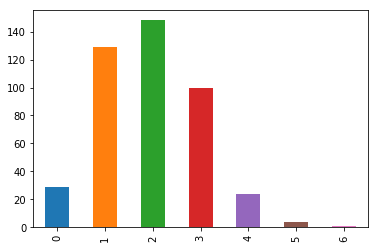

In [17]:
def count_tags(row):
    count = len([r for r in row if r!=""])-1
    return count
    
tag_count = decisions.apply(count_tags, axis=1)

display(tag_count.describe())
tag_count.groupby(tag_count).count().plot.bar()

Now we want the result for each tag class. First, we define a function that does the grouping and one that plots the results

In [18]:
def group_tag(tag_class):
    grouped = decisions[tag_class].value_counts()
    return pd.DataFrame(grouped)

def plot_grouping(grouped_tags, tag_class):
    group_wo_empty = grouped_tags.loc[grouped_tags.index!=""]
    group_wo_empty.plot.bar()
    return

### Quality

,quality
,324
traceability,39
consistency,14
understandability,13
unambiguousness,12
general,8
other,8
completeness,7
feasibility,2
"completeness, consistency",2


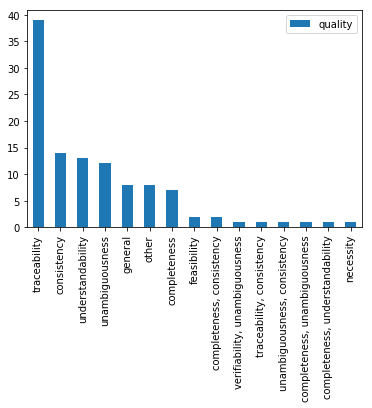

In [19]:
tag_class="quality"
grouped_tags=group_tag(tag_class)
display(grouped_tags)
plot_grouping(grouped_tags, tag_class)

### People

,people
,378
skills,22
collaboration,13
communication,10
other,5
subjectivity,4
"collaboration, communication",2
"skills, communication",1


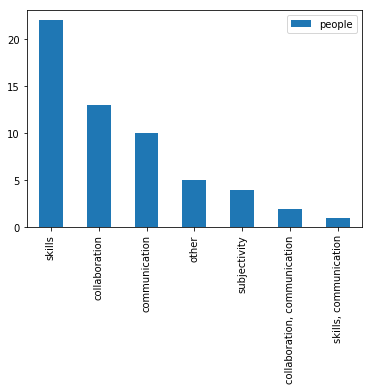

In [20]:
tag_class="people"
grouped_tags=group_tag(tag_class)
display(grouped_tags)
plot_grouping(grouped_tags, tag_class)

### Process

,process
,223
automation,46
modeling,24
quality assurance,24
evolution,14
prioritization,12
decision-making,11
execution,11
formalization,10
reuse,9


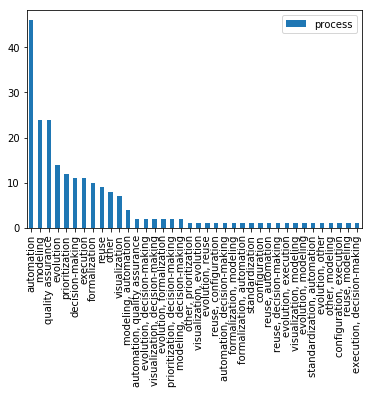

In [21]:
tag_class="process"
grouped_tags=group_tag(tag_class)
display(grouped_tags)
plot_grouping(grouped_tags, tag_class)

### Documentation

,documentation
,335
natural language,34
general,13
goal model,9
review report,7
other,7
use case,6
feature model,5
scenarios,4
user story,3


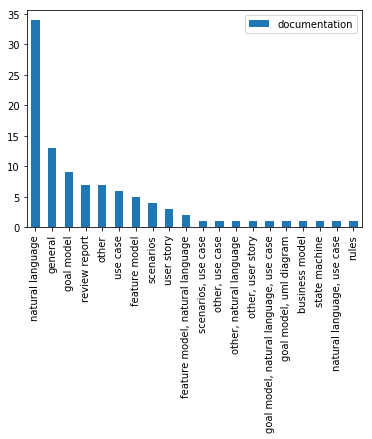

In [22]:
tag_class="documentation"
grouped_tags=group_tag(tag_class)
display(grouped_tags)
plot_grouping(grouped_tags, tag_class)

### Subject Matter (level 1)

,SM_first
,298
quality ====>,66
process,20
goals,15
architecture,8
other,8
tests,4
"goals, quality ====>",4
"quality ====>, functional",4
"architecture, quality ====>",2


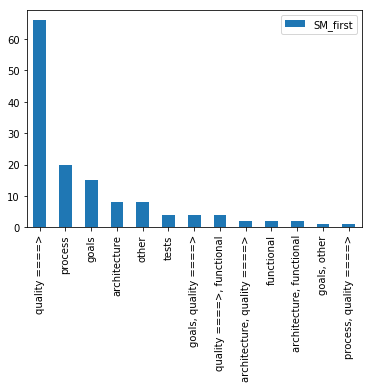

In [23]:
tag_class="SM_first"
grouped_tags=group_tag(tag_class)
display(grouped_tags)
plot_grouping(grouped_tags, tag_class)

### Subject Matter (level 2)

,SM_second
,362
security,27
other ====>,23
generic,18
performance efficiency,4
usability,1


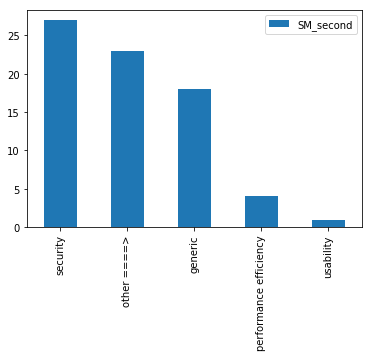

In [24]:
tag_class="SM_second"
grouped_tags=group_tag(tag_class)
display(grouped_tags)
plot_grouping(grouped_tags, tag_class)

### Subject Matter (level 3)

,SM_third
,424
safety,4
compliance,3
sustainability,3
dependability,1


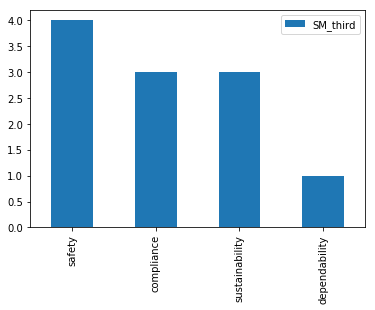

In [25]:
tag_class="SM_third"
grouped_tags=group_tag(tag_class)
display(grouped_tags)
plot_grouping(grouped_tags, tag_class)

### Phase

,phase
,289
elicitation,54
validation and verification,38
documentation,22
management,20
"validation and verification, elicitation",5
negotiation,4
"elicitation, documentation",2
"validation and verification, documentation",1


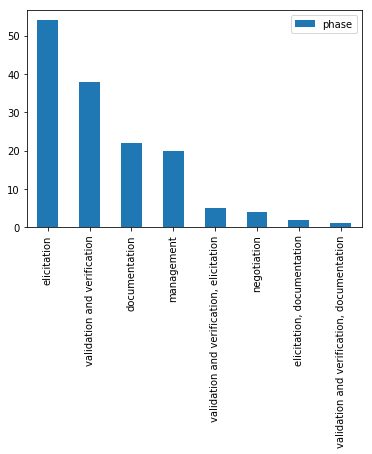

In [26]:
tag_class="phase"
grouped_tags=group_tag(tag_class)
display(grouped_tags)
plot_grouping(grouped_tags, tag_class)

## Most Common Combinations of Tags

In [27]:
combined_tags = decisions.groupby(["quality","people","process","documentation","SM_first", "phase"]).count().reset_index()
combined_tags.sort_values("summary",ascending=False).head(10)

,quality,people,process,documentation,SM_first,phase,summary,SM_second,SM_third
0,,,,,,,29,29,29
2,,,,,,elicitation,14,14,14
20,,,,,quality ====>,,14,14,14
228,traceability,,,,,,12,12,12
22,,,,,quality ====>,elicitation,9,9,9
124,,,prioritization,,,,7,7,7
16,,,,,process,,6,6,6
173,,skills,,,,,6,6,6
233,traceability,,automation,,,,6,6,6
154,,collaboration,,,,,5,5,5
